<a href="https://colab.research.google.com/github/navinavin33/Practical-Discrete-Mathematics/blob/master/Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

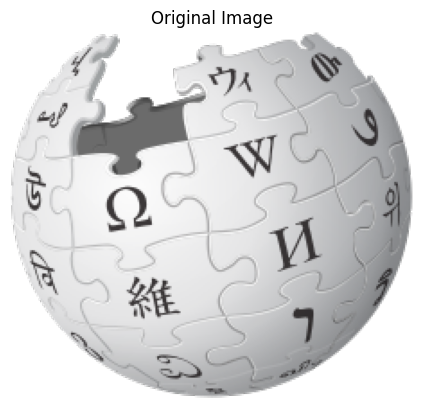

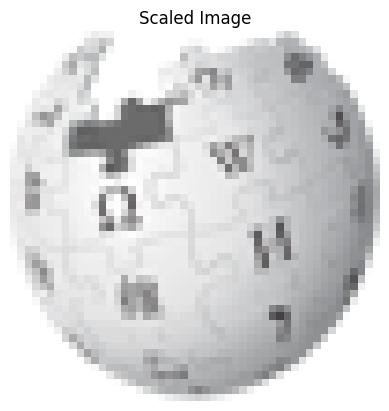

In [6]:
#get the info
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Scale the image
new_size = (50, 50)  # Replace with your desired size
scaled_img = img.resize(new_size)

# Display the scaled image
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')
plt.show()

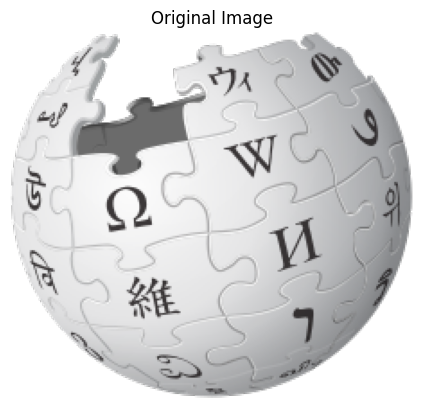

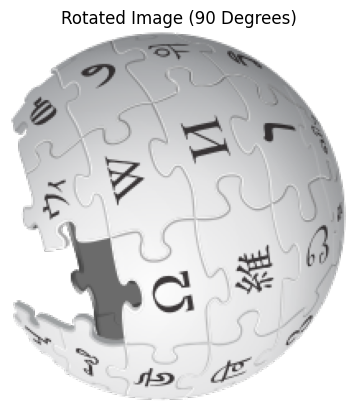

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Load the image
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Wikipedia-logo-v2.svg/225px-Wikipedia-logo-v2.svg.png'  # Replace with your image URL
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display the original image
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()


# Transpose the image by 90 degrees
rotated_img = img.transpose(Image.ROTATE_90)

# Display the rotated image
plt.imshow(rotated_img)
plt.title('Rotated Image (90 Degrees)')
plt.axis('off')
plt.show()


In [4]:
!pip install mediapipe opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 53.3 MB/s eta 0:00:00


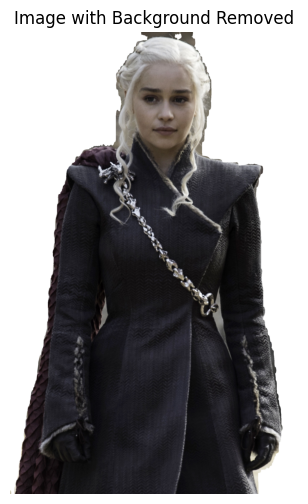

In [5]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# URL of the image
image_url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"

# Download the image from the URL
response = urllib.request.urlopen(image_url)
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert image to RGB for Mediapipe processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_no_bg)
plt.axis("off")
plt.title("Image with Background Removed")
plt.show()


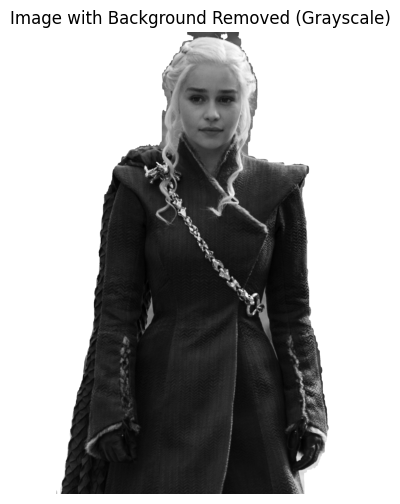

In [12]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import urllib.request
import numpy as np

# URL of the image
image_url = "https://vignette.wikia.nocookie.net/gameofthrones/images/2/25/707_Daenerys_Profil.jpg/revision/latest?cb=20170829215522&path-prefix=de"

# Download the image from the URL
response = urllib.request.urlopen(image_url)
image_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Convert image to RGB for Mediapipe processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load the Mediapipe Selfie Segmentation
mp_selfie_segmentation = mp.solutions.selfie_segmentation.SelfieSegmentation(model_selection=1)

# Process the image
result = mp_selfie_segmentation.process(image_rgb)

# Create a mask and apply it
mask = result.segmentation_mask > 0.1  # Threshold for background removal
image_no_bg = image_rgb.copy()
image_no_bg[~mask] = [255, 255, 255]  # Set background to white

# Convert the background-removed image to grayscale
image_no_bg_gray = cv2.cvtColor(image_no_bg, cv2.COLOR_RGB2GRAY)

# Display the result
plt.figure(figsize=(10, 6))
plt.imshow(image_no_bg_gray, cmap="gray")
plt.axis("off")
plt.title("Image with Background Removed (Grayscale)")
plt.show()


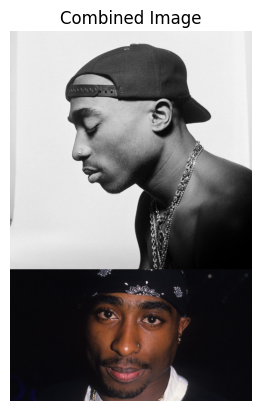

In [23]:
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# URLs of two Creative Commons images
image_url1 = "https://static01.nyt.com/images/2021/11/02/arts/02tupac-item-1/02tupac-item-1-jumbo.jpg?quality=75&auto=webp"
image_url2 = "https://hips.hearstapps.com/hmg-prod/images/tupac_shakur_1995_steve_eichner_getty_images_83928439_promo.jpg?resize=1200:*"

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Download images
image1 = download_image(image_url1)
image2 = download_image(image_url2)

# Resize images to the same width
width = min(image1.shape[1], image2.shape[1])
image1_resized = cv2.resize(image1, (width, int(image1.shape[0] * width / image1.shape[1])))
image2_resized = cv2.resize(image2, (width, int(image2.shape[0] * width / image2.shape[1])))

# Combine images vertically
combined_image = cv2.vconcat([image1_resized, image2_resized])

# Convert the combined image to RGB format for compatibility with PIL
combined_image_rgb = cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB)

# Save the combined image as JPG using PIL
output_path = "combined_image.jpg"
Image.fromarray(combined_image_rgb).save(output_path)

# Display the combined image using matplotlib
plt.imshow(combined_image_rgb)
plt.axis('off')
plt.title("Combined Image")
plt.show()


